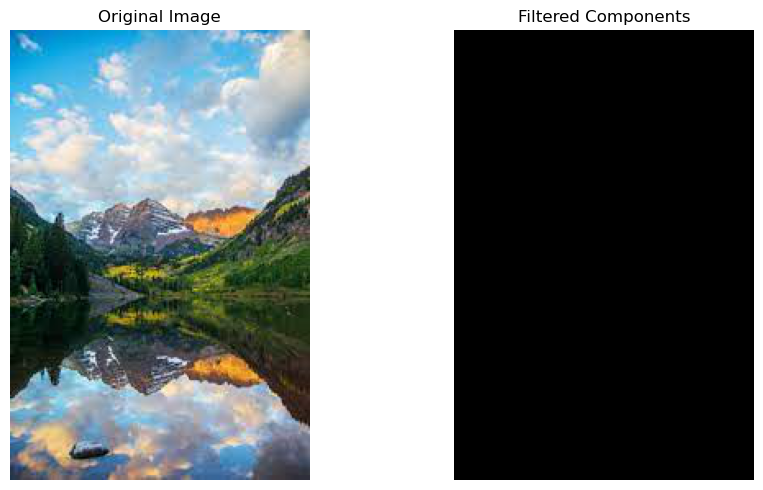

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("cv2.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Threshold using Otsu
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Connected components analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)

# Prepare output image
output = np.zeros(gray.shape, dtype="uint8")

# Loop through components and filter by area
for i in range(1, num_labels):  # skip background
    area = stats[i, cv2.CC_STAT_AREA]
    if 140 < area < 400:
        componentMask = (labels == i).astype("uint8") * 255
        output = cv2.bitwise_or(output, componentMask)

# Display using matplotlib
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(output, cmap="gray")
plt.title("Filtered Components")
plt.axis("off")

plt.tight_layout()
plt.show()
